# Week 3: linear regression

In this assignment, we will use data from Mashable (www.mashable.com). Mashable is an online magazine that focuses on producing viral content. You may wonder: what makes an article go viral? That’s what you will be trying to find out!

You use linear regression to predict the (log) number of shares from the other variables. Note that all variables can be calculated before an article is put online. Thus, Mashable could use your model to predict the (log) number of shares.


---
- Explain briefly in your own words how linear regression works

/Linear regression looks at the correlation between 2 variables and sees how it is different from the 0-line. I don't know what the line is called. But based on that lined it makes assumptions/predictions where other variables should be.

## Your pre-processing steps

In [1]:
# Import everything
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Add and show dataframe
df = pd.read_csv('data Mashable.csv')
df

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375000,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000000,6000,3.778151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,24995,http://mashable.com/2013/09/25/parkinsons-spoon/,9,342,9,0,4.628655,0,0,0,...,0,0,0,0,0.448753,0.250524,0.642857,0.214286,8500,3.929419
24995,24996,http://mashable.com/2013/05/20/esquire-weekly-...,6,243,1,0,5.111111,0,0,1,...,0,0,0,0,0.418081,0.206035,0.000000,0.000000,675,2.829304
24996,24997,http://mashable.com/2014/07/13/google-world-cu...,11,1334,4,4,4.613943,0,1,0,...,0,0,1,1,0.486041,0.102557,0.288889,-0.155556,1500,3.176091
24997,24998,http://mashable.com/2013/01/17/thinkpad-chrome...,7,263,1,0,4.749049,0,0,0,...,0,0,0,0,0.627143,0.387381,0.000000,0.000000,817,2.912222


## Training a linear regression model to predict the number of shares, using exactly 5 variables (collections of dummy variables, such as weekday_is_monday, weekday_is_tuesday, etc. count as 1 variable). Report:
- How you selected the variables
- An equation of the model (please use Markdown formulas)
- Plots of the relation of your selected variables with the target
- Comment on the linearity of those relationships
- Evaluating the model on the test data
- - Predictive power of the model (R2, RMSE)
- - Investigating the residuals

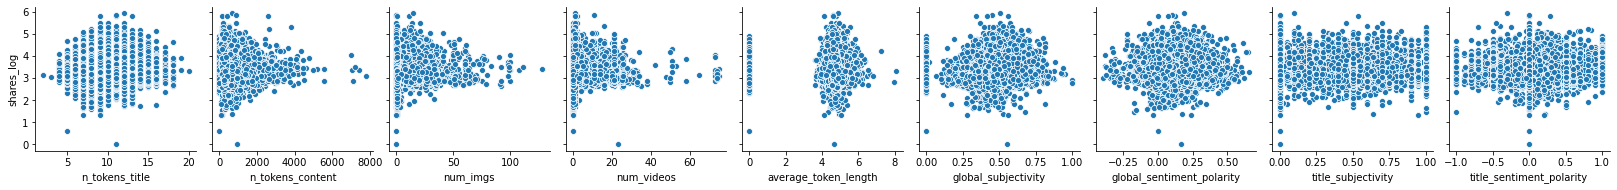

In [2]:
sns.pairplot(df,
             y_vars=["shares_log"],
             x_vars=['n_tokens_title', 'n_tokens_content', 'num_imgs', 'num_videos', 'average_token_length', 'global_subjectivity','global_sentiment_polarity','title_subjectivity','title_sentiment_polarity'])
plt.show()

In [3]:
# Let's choose the variables.

df_subset = df[["n_tokens_title", "n_tokens_content", "num_imgs","global_subjectivity", 'global_sentiment_polarity']]
df_subset.head(5)

,n_tokens_title,n_tokens_content,num_imgs,global_subjectivity,global_sentiment_polarity
0,10,821,12,0.439379,0.082486
1,9,489,6,0.300454,0.027715
2,11,131,0,0.575486,0.259120
3,8,556,2,0.327220,0.134424
4,9,880,18,0.507709,0.109256


In [4]:
y = df['shares_log'] #We need to take out shares as our Y-variable
X = df_subset #The 5 factors that help predict the amount of shares
X.index = df['url'] #To keep track on what article we're on
X.head()

,n_tokens_title,n_tokens_content,num_imgs,global_subjectivity,global_sentiment_polarity
url,,,,,
http://mashable.com/2013/10/29/ashton-kutcher-lenovo/,10,821,12,0.439379,0.082486
http://mashable.com/2014/09/08/mashies-sept-19-deadline/,9,489,6,0.300454,0.027715
http://mashable.com/2013/02/01/hello-kitty-rocket/,11,131,0,0.575486,0.259120
http://mashable.com/2014/02/06/add-us-on-snapchat/,8,556,2,0.327220,0.134424
http://mashable.com/2014/01/07/lindsey-vonn-withdraws-sochi-olympics-knee-injury/,9,880,18,0.507709,0.109256


## Splitting the dataset into a training and test set

We split the dataset to train the model (70%) and to test the model (30%)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #Data has been split
X_train.head() #The train set

#(len(X_train)) 17499 rows
#(len(X_test)) 7500 rows

,n_tokens_title,n_tokens_content,num_imgs,global_subjectivity,global_sentiment_polarity
url,,,,,
http://mashable.com/2013/02/03/puppy-bowl-online/,7,141,0,0.451711,0.230736
http://mashable.com/2014/09/11/bridesmaid-lost-dress-sydney/,9,392,9,0.476976,0.078816
http://mashable.com/2013/03/08/facebook-acquires-storylane/,9,622,1,0.488495,0.263511
http://mashable.com/2014/04/29/yahoo-mail-app-redesign/,12,251,23,0.545746,0.052758
http://mashable.com/2013/08/28/chef-knife-moves-video/,8,940,13,0.507042,0.063513


## Training & Testing

5 variables were chosen because we assume they have an affect of the amount of shares and we are going to find out how much.

In [6]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

In [7]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #This creates a smaller df with a column with the column names, and the coefficients of the model
coef

,0
-0.001967,n_tokens_title
-0.000012,n_tokens_content
0.004195,num_imgs
0.272195,global_subjectivity
0.132338,global_sentiment_polarity


As we can see here above, global_subjectivity and global_sentiment_polarity influences the most shares. But, it's very little.

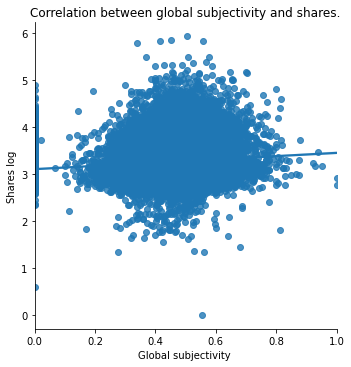

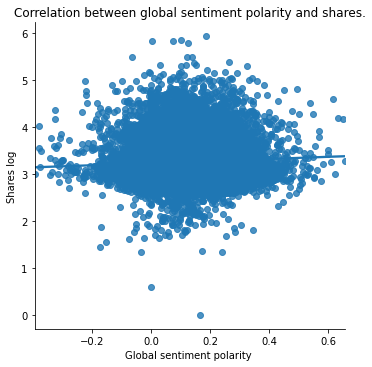

In [8]:
sns.lmplot(x='global_subjectivity', y='shares_log', data=df)
plt.title('Correlation between global subjectivity and shares.')
plt.xlabel("Global subjectivity ")
plt.ylabel("Shares log")
plt.show()

sns.lmplot(x='global_sentiment_polarity', y='shares_log', data=df)
plt.title('Correlation between global sentiment polarity and shares.')
plt.xlabel("Global sentiment polarity ")
plt.ylabel("Shares log")
plt.show()

I don't know if it's necessary but let's do some data cleaning on the global subjetivity and remove the values that are equal to 0.

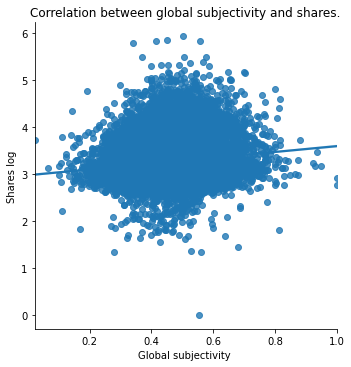

In [9]:
df['global_subjectivity'] = df['global_subjectivity'].apply(pd.to_numeric, errors='coerce')

#To remove the values equal to 0 we need to create a function that we then apply to the entire column
def above_01(x):
    if(x == 0): 
        return float('NaN')
    else: 
        return x
df['global_subjectivity'] = df['global_subjectivity'].apply(above_01)


sns.lmplot(x='global_subjectivity', y='shares_log', data=df)
plt.title('Correlation between global subjectivity and shares.')
plt.xlabel("Global subjectivity ")
plt.ylabel("Shares log")
plt.show()

Now we have plotted the global subjectivity and the global sentiment polarity, we can see both have an increase of shares as they increase, because of the linear line that rises.

Now the predictive model is going to be created and will show how many shares an article will have, based on the 5 variables which are selected. We predict the number of shares_log in another column that is created. The predicted number is deducted from the actual number, which ends up in the residual.

In [10]:
y_pred = lm.predict(X_test) #Generate the predictions
resid = y_pred - y_test #Get the residuals by subtracting the prediction from the actual shares
resid.head(4) #Some residuals

15754   -0.319434
19390    0.121050
1603    -0.060077
21118   -0.299001
Name: shares_log, dtype: float64

In the following graphic, the residuals and the shares log is plotted. In this plot you can see that the errors in the shares log are not more than ≈ -2 or +2 off. This seems little but it's a log number.

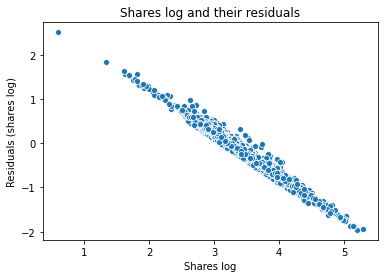

In [11]:
sns.scatterplot(x=y_test,y=resid,data=df)
plt.title('Shares log and their residuals')
plt.xlabel('Shares log')
plt.ylabel('Residuals (shares log)')
plt.show()

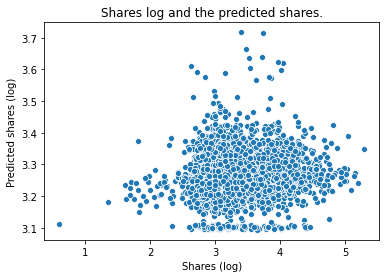

In [12]:
sns.scatterplot(x=y_test,y=y_pred)
plt.title('Shares log and the predicted shares.')
plt.xlabel('Shares (log)')
plt.ylabel('Predicted shares (log)')
plt.show()

In [13]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.01562626542048351

The model has an accuracy of 1.56%. It doesn't work well to predict the amount of shares. We will also calculate an RMSE. This shows how much the shares log is generally off.

In [14]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test, y_test_p))

0.4028467113583319

In [15]:
10**(10 **(math.sqrt(mean_squared_error(y_test, y_test_p))))

337.602312357889

To get back the actual number of shares and not the log the following calculations are being made.

In [16]:
y = 3.3222
# y=
10**(y)

2099.9067037624263

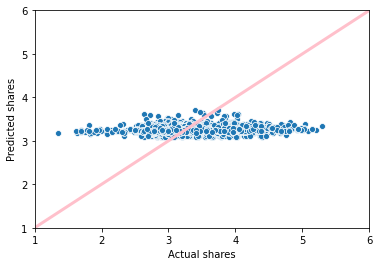

In [17]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual shares')
plt.ylabel('Predicted shares')
plt.xlim([1,6]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([1,6])
plt.plot([1, 6], [1, 6], color='pink', lw=3) #Plot a diagonal length
plt.show()

This graphic shows that the model is not working well. This is shown with a red line (which is perfectly related). The scatters are not following the red line.